# IMPORTING LIBRARIES

In [201]:
import numpy as np
import pandas as pd
import pickle as pk
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score,mean_absolute_error

# DATA IMPORTING AND READING

In [8]:
data = pd.read_csv('t20_wc.csv')
data

,match_id,batting_team,bowling_team,ball,runs,player_dismissed,city,venue
0,2,Australia,Sri Lanka,0.1,0,0,NaN,Melbourne Cricket Ground
1,2,Australia,Sri Lanka,0.2,0,0,NaN,Melbourne Cricket Ground
2,2,Australia,Sri Lanka,0.3,1,0,NaN,Melbourne Cricket Ground
3,2,Australia,Sri Lanka,0.4,2,0,NaN,Melbourne Cricket Ground
4,2,Australia,Sri Lanka,0.5,0,0,NaN,Melbourne Cricket Ground
...,...,...,...,...,...,...,...,...
63883,964,Sri Lanka,Australia,19.3,1,0,Colombo,R Premadasa Stadium
63884,964,Sri Lanka,Australia,19.4,0,0,Colombo,R Premadasa Stadium
63885,964,Sri Lanka,Australia,19.5,0,DM de Silva,Colombo,R Premadasa Stadium
63886,964,Sri Lanka,Australia,19.6,2,0,Colombo,R Premadasa Stadium


# DATASET TO BE FEEDDED TO MACHINE

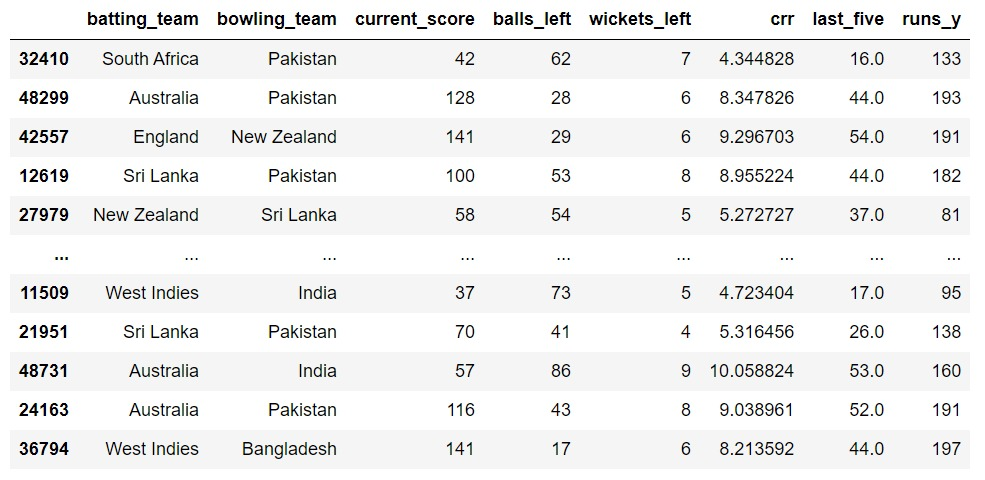

In [11]:
data.head()

,match_id,batting_team,bowling_team,ball,runs,player_dismissed,city,venue
0,2,Australia,Sri Lanka,0.1,0,0,NaN,Melbourne Cricket Ground
1,2,Australia,Sri Lanka,0.2,0,0,NaN,Melbourne Cricket Ground
2,2,Australia,Sri Lanka,0.3,1,0,NaN,Melbourne Cricket Ground
3,2,Australia,Sri Lanka,0.4,2,0,NaN,Melbourne Cricket Ground
4,2,Australia,Sri Lanka,0.5,0,0,NaN,Melbourne Cricket Ground


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63888 entries, 0 to 63887
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   match_id          63888 non-null  int64  
 1   batting_team      63888 non-null  object 
 2   bowling_team      63888 non-null  object 
 3   ball              63888 non-null  float64
 4   runs              63888 non-null  int64  
 5   player_dismissed  63888 non-null  object 
 6   city              55340 non-null  object 
 7   venue             63888 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 3.9+ MB


In [13]:
data.isnull().sum()

match_id               0
batting_team           0
bowling_team           0
ball                   0
runs                   0
player_dismissed       0
city                8548
venue                  0
dtype: int64

# DATA PREPROCESSING

In [18]:
data[data['city'].isna()]

,match_id,batting_team,bowling_team,ball,runs,player_dismissed,city,venue
0,2,Australia,Sri Lanka,0.1,0,0,NaN,Melbourne Cricket Ground
1,2,Australia,Sri Lanka,0.2,0,0,NaN,Melbourne Cricket Ground
2,2,Australia,Sri Lanka,0.3,1,0,NaN,Melbourne Cricket Ground
3,2,Australia,Sri Lanka,0.4,2,0,NaN,Melbourne Cricket Ground
4,2,Australia,Sri Lanka,0.5,0,0,NaN,Melbourne Cricket Ground
...,...,...,...,...,...,...,...,...
63757,963,Australia,Sri Lanka,19.2,1,0,NaN,Pallekele International Cricket Stadium
63758,963,Australia,Sri Lanka,19.3,4,0,NaN,Pallekele International Cricket Stadium
63759,963,Australia,Sri Lanka,19.4,4,0,NaN,Pallekele International Cricket Stadium
63760,963,Australia,Sri Lanka,19.5,6,0,NaN,Pallekele International Cricket Stadium


In [19]:
data['city'].unique()

array([nan, 'Victoria', 'Napier', 'Mount Maunganui', 'Auckland',
       'Southampton', 'Taunton', 'Cardiff', 'Chester-le-Street', 'Kanpur',
       'Nagpur', 'Bangalore', 'Lauderhill', 'Abu Dhabi', 'Hobart',
       'Wellington', 'Hamilton', 'Bloemfontein', 'Potchefstroom',
       'Barbados', 'Trinidad', 'Colombo', 'St Kitts', 'Jamaica', 'Nelson',
       'Ranchi', 'Birmingham', 'Manchester', 'Bristol', 'Delhi', 'Rajkot',
       'Thiruvananthapuram', 'Lahore', 'Johannesburg', 'Centurion',
       'Cape Town', 'Cuttack', 'Indore', 'Mumbai', 'Dhaka', 'Karachi',
       'Brisbane', 'Dehradun', 'Sylhet', 'Kolkata', 'Lucknow', 'Chennai',
       'Gros Islet', 'Basseterre', 'Visakhapatnam', 'Bengaluru',
       'Adelaide', 'Melbourne', 'Sydney', 'Canberra', 'Perth',
       'East London', 'Durban', 'Port Elizabeth', 'Chandigarh',
       'Hyderabad', 'Christchurch', 'Providence', 'Kandy', 'Chattogram',
       'Pune', 'Paarl', 'London', 'Nairobi', 'Nottingham', 'King City',
       'Guyana', 'St Lucia'

In [20]:
data['venue'].unique()

array(['Melbourne Cricket Ground', 'Simonds Stadium, South Geelong',
       'Adelaide Oval', 'McLean Park', 'Bay Oval', 'Eden Park',
       'The Rose Bowl', 'County Ground', 'Sophia Gardens',
       'Riverside Ground', 'Green Park',
       'Vidarbha Cricket Association Stadium, Jamtha',
       'M Chinnaswamy Stadium',
       'Central Broward Regional Park Stadium Turf Ground',
       'Dubai International Cricket Stadium', 'Sheikh Zayed Stadium',
       'Sydney Cricket Ground', 'Bellerive Oval', 'Westpac Stadium',
       'Seddon Park', 'Mangaung Oval', 'Senwes Park',
       'Kensington Oval, Bridgetown', "Queen's Park Oval, Port of Spain",
       'R Premadasa Stadium', 'Warner Park, Basseterre',
       'Sabina Park, Kingston', 'R.Premadasa Stadium, Khettarama',
       'Saxton Oval', 'JSCA International Stadium Complex', 'Edgbaston',
       'Old Trafford', 'Arun Jaitley Stadium',
       'Saurashtra Cricket Association Stadium',
       'Greenfield International Stadium', 'Gaddafi Stadium'

In [37]:
data['city'] = data['city'].mask(data['city'].isna(),data[data['city'].isna()]['venue'].str.split().str.get(0))

In [38]:
data.isnull().sum()

match_id            0
batting_team        0
bowling_team        0
ball                0
runs                0
player_dismissed    0
city                0
venue               0
dtype: int64

In [39]:
data.head(3)

,match_id,batting_team,bowling_team,ball,runs,player_dismissed,city,venue
0,2,Australia,Sri Lanka,0.1,0,0,Melbourne,Melbourne Cricket Ground
1,2,Australia,Sri Lanka,0.2,0,0,Melbourne,Melbourne Cricket Ground
2,2,Australia,Sri Lanka,0.3,1,0,Melbourne,Melbourne Cricket Ground


In [40]:
len(data)

63888

In [41]:
120*5

600

In [42]:
data['venue'].value_counts()

Shere Bangla National Stadium          3420
R Premadasa Stadium                    2983
Dubai International Cricket Stadium    2969
New Wanderers Stadium                  2819
Eden Park                              2532
                                       ... 
Senwes Park                             122
Hagley Oval                             121
Subrata Roy Sahara Stadium              121
Sardar Patel Stadium, Motera            121
Carrara Oval                             64
Name: venue, Length: 94, dtype: int64

In [43]:
data['city'].value_counts()

Colombo          4086
Mirpur           3420
Johannesburg     3331
Dubai            2969
Auckland         2532
                 ... 
Nairobi           123
Potchefstroom     122
Dharamsala        122
Ahmedabad         121
Carrara            64
Name: city, Length: 86, dtype: int64

In [48]:
temp_grounds = data['venue'].value_counts()
temp_grounds = temp_grounds[temp_grounds>600].index
temp_grounds

Index(['Shere Bangla National Stadium', 'R Premadasa Stadium',
       'Dubai International Cricket Stadium', 'New Wanderers Stadium',
       'Eden Park', 'Newlands', 'Pallekele International Cricket Stadium',
       'Kensington Oval, Bridgetown', 'Melbourne Cricket Ground',
       'Beausejour Stadium, Gros Islet', 'Kennington Oval', 'Kingsmead',
       'Westpac Stadium', 'Central Broward Regional Park Stadium Turf Ground',
       'Seddon Park', 'SuperSport Park', 'Old Trafford',
       'Zahur Ahmed Chowdhury Stadium', 'R.Premadasa Stadium, Khettarama',
       'Sheikh Zayed Stadium', 'Sydney Cricket Ground', 'Trent Bridge',
       'The Rose Bowl', 'Bay Oval', 'Wankhede Stadium', 'Eden Gardens',
       'Gaddafi Stadium', 'Vidarbha Cricket Association Stadium, Jamtha',
       'Lord's', 'Adelaide Oval', 'M Chinnaswamy Stadium',
       'Warner Park, Basseterre', 'Sophia Gardens',
       'Queen's Park Oval, Port of Spain'],
      dtype='object')

In [49]:
temp_cities = data['city'].value_counts()
temp_cities = temp_cities[temp_cities>600].index
temp_cities

Index(['Colombo', 'Mirpur', 'Johannesburg', 'Dubai', 'Auckland', 'Cape Town',
       'London', 'Pallekele', 'Barbados', 'Sydney', 'Melbourne', 'Durban',
       'St Lucia', 'Wellington', 'Lauderhill', 'Hamilton', 'Centurion',
       'Manchester', 'Abu Dhabi', 'Mumbai', 'Nottingham', 'Southampton',
       'Mount Maunganui', 'Chittagong', 'Kolkata', 'Lahore', 'Delhi', 'Nagpur',
       'Chandigarh', 'Adelaide', 'Bangalore', 'St Kitts', 'Cardiff',
       'Christchurch', 'Trinidad'],
      dtype='object')

In [54]:
data = data[data['city'].isin(temp_cities)].reset_index(drop=True)
data

,match_id,batting_team,bowling_team,ball,runs,player_dismissed,city,venue
0,2,Australia,Sri Lanka,0.1,0,0,Melbourne,Melbourne Cricket Ground
1,2,Australia,Sri Lanka,0.2,0,0,Melbourne,Melbourne Cricket Ground
2,2,Australia,Sri Lanka,0.3,1,0,Melbourne,Melbourne Cricket Ground
3,2,Australia,Sri Lanka,0.4,2,0,Melbourne,Melbourne Cricket Ground
4,2,Australia,Sri Lanka,0.5,0,0,Melbourne,Melbourne Cricket Ground
...,...,...,...,...,...,...,...,...
50496,964,Sri Lanka,Australia,19.3,1,0,Colombo,R Premadasa Stadium
50497,964,Sri Lanka,Australia,19.4,0,0,Colombo,R Premadasa Stadium
50498,964,Sri Lanka,Australia,19.5,0,DM de Silva,Colombo,R Premadasa Stadium
50499,964,Sri Lanka,Australia,19.6,2,0,Colombo,R Premadasa Stadium


In [59]:
type(data)

pandas.core.frame.DataFrame

In [65]:
data['current_score'] = data.groupby(['match_id'])['runs'].cumsum()
data.head()

,match_id,batting_team,bowling_team,ball,runs,player_dismissed,city,venue,current_score
0,2,Australia,Sri Lanka,0.1,0,0,Melbourne,Melbourne Cricket Ground,0
1,2,Australia,Sri Lanka,0.2,0,0,Melbourne,Melbourne Cricket Ground,0
2,2,Australia,Sri Lanka,0.3,1,0,Melbourne,Melbourne Cricket Ground,1
3,2,Australia,Sri Lanka,0.4,2,0,Melbourne,Melbourne Cricket Ground,3
4,2,Australia,Sri Lanka,0.5,0,0,Melbourne,Melbourne Cricket Ground,3


In [67]:
data['current_over'] = data['ball'].astype(int)
data.head()

,match_id,batting_team,bowling_team,ball,runs,player_dismissed,city,venue,current_score,current_over
0,2,Australia,Sri Lanka,0.1,0,0,Melbourne,Melbourne Cricket Ground,0,0
1,2,Australia,Sri Lanka,0.2,0,0,Melbourne,Melbourne Cricket Ground,0,0
2,2,Australia,Sri Lanka,0.3,1,0,Melbourne,Melbourne Cricket Ground,1,0
3,2,Australia,Sri Lanka,0.4,2,0,Melbourne,Melbourne Cricket Ground,3,0
4,2,Australia,Sri Lanka,0.5,0,0,Melbourne,Melbourne Cricket Ground,3,0


In [68]:
data.drop(columns=['venue'],inplace=True)

In [70]:
data.columns

Index(['match_id', 'batting_team', 'bowling_team', 'ball', 'runs',
       'player_dismissed', 'city', 'current_score', 'current_over'],
      dtype='object')

In [96]:
data['ball'].astype(str).str.get(-1)

0        1
1        2
2        3
3        4
4        5
        ..
50496    3
50497    4
50498    5
50499    6
50500    7
Name: ball, Length: 50501, dtype: object

In [97]:
data['current_ball'] = data['ball'].astype(str).str.get(-1)
data.head()

,match_id,batting_team,bowling_team,ball,runs,player_dismissed,city,current_score,current_over,current_ball
0,2,Australia,Sri Lanka,0.1,0,0,Melbourne,0,0,1
1,2,Australia,Sri Lanka,0.2,0,0,Melbourne,0,0,2
2,2,Australia,Sri Lanka,0.3,1,0,Melbourne,1,0,3
3,2,Australia,Sri Lanka,0.4,2,0,Melbourne,3,0,4
4,2,Australia,Sri Lanka,0.5,0,0,Melbourne,3,0,5


In [106]:
data.loc[data['player_dismissed']!='0', 'player_dismissed'] = 1

In [113]:
data['player_dismissed'] = data['player_dismissed'].astype(int)

In [119]:
data['wickets_left'] = data.groupby('match_id')['player_dismissed'].cumsum()

In [121]:
data['wickets_left'] = 10 - data['wickets_left']

In [133]:
data['player_dismissed'] = data.groupby('match_id')['player_dismissed'].cumsum()

In [134]:
data

,match_id,batting_team,bowling_team,ball,runs,player_dismissed,city,current_score,current_over,current_ball,wickets_left,total_deliveries,balls_left
0,2,Australia,Sri Lanka,0.1,0,0,Melbourne,0,0,1,10,1,119
1,2,Australia,Sri Lanka,0.2,0,0,Melbourne,0,0,2,10,2,118
2,2,Australia,Sri Lanka,0.3,1,0,Melbourne,1,0,3,10,3,117
3,2,Australia,Sri Lanka,0.4,2,0,Melbourne,3,0,4,10,4,116
4,2,Australia,Sri Lanka,0.5,0,0,Melbourne,3,0,5,10,5,115
...,...,...,...,...,...,...,...,...,...,...,...,...,...
50496,964,Sri Lanka,Australia,19.3,1,8,Colombo,125,19,3,2,117,3
50497,964,Sri Lanka,Australia,19.4,0,8,Colombo,125,19,4,2,118,2
50498,964,Sri Lanka,Australia,19.5,0,9,Colombo,125,19,5,1,119,1
50499,964,Sri Lanka,Australia,19.6,2,9,Colombo,127,19,6,1,120,0


In [126]:
data['current_ball'] = data['current_ball'].astype(int)

In [127]:
data['current_over']*6 + data['current_ball']

0          1
1          2
2          3
3          4
4          5
        ... 
50496    117
50497    118
50498    119
50499    120
50500    121
Length: 50501, dtype: int32

In [128]:
data['total_deliveries'] = data['current_over']*6 + data['current_ball']

In [129]:
data.head()

,match_id,batting_team,bowling_team,ball,runs,player_dismissed,city,current_score,current_over,current_ball,wickets_left,total_deliveries
0,2,Australia,Sri Lanka,0.1,0,0,Melbourne,0,0,1,10,1
1,2,Australia,Sri Lanka,0.2,0,0,Melbourne,0,0,2,10,2
2,2,Australia,Sri Lanka,0.3,1,0,Melbourne,1,0,3,10,3
3,2,Australia,Sri Lanka,0.4,2,0,Melbourne,3,0,4,10,4
4,2,Australia,Sri Lanka,0.5,0,0,Melbourne,3,0,5,10,5


In [130]:
120 - data['total_deliveries']

0        119
1        118
2        117
3        116
4        115
        ... 
50496      3
50497      2
50498      1
50499      0
50500     -1
Name: total_deliveries, Length: 50501, dtype: int32

In [131]:
data['balls_left'] = 120 - data['total_deliveries']
data

,match_id,batting_team,bowling_team,ball,runs,player_dismissed,city,current_score,current_over,current_ball,wickets_left,total_deliveries,balls_left
0,2,Australia,Sri Lanka,0.1,0,0,Melbourne,0,0,1,10,1,119
1,2,Australia,Sri Lanka,0.2,0,0,Melbourne,0,0,2,10,2,118
2,2,Australia,Sri Lanka,0.3,1,0,Melbourne,1,0,3,10,3,117
3,2,Australia,Sri Lanka,0.4,2,0,Melbourne,3,0,4,10,4,116
4,2,Australia,Sri Lanka,0.5,0,0,Melbourne,3,0,5,10,5,115
...,...,...,...,...,...,...,...,...,...,...,...,...,...
50496,964,Sri Lanka,Australia,19.3,1,0,Colombo,125,19,3,2,117,3
50497,964,Sri Lanka,Australia,19.4,0,0,Colombo,125,19,4,2,118,2
50498,964,Sri Lanka,Australia,19.5,0,1,Colombo,125,19,5,1,119,1
50499,964,Sri Lanka,Australia,19.6,2,0,Colombo,127,19,6,1,120,0


In [132]:
data['balls_left'].mask(data['balls_left']<0,0,inplace=True)

In [135]:
data

,match_id,batting_team,bowling_team,ball,runs,player_dismissed,city,current_score,current_over,current_ball,wickets_left,total_deliveries,balls_left
0,2,Australia,Sri Lanka,0.1,0,0,Melbourne,0,0,1,10,1,119
1,2,Australia,Sri Lanka,0.2,0,0,Melbourne,0,0,2,10,2,118
2,2,Australia,Sri Lanka,0.3,1,0,Melbourne,1,0,3,10,3,117
3,2,Australia,Sri Lanka,0.4,2,0,Melbourne,3,0,4,10,4,116
4,2,Australia,Sri Lanka,0.5,0,0,Melbourne,3,0,5,10,5,115
...,...,...,...,...,...,...,...,...,...,...,...,...,...
50496,964,Sri Lanka,Australia,19.3,1,8,Colombo,125,19,3,2,117,3
50497,964,Sri Lanka,Australia,19.4,0,8,Colombo,125,19,4,2,118,2
50498,964,Sri Lanka,Australia,19.5,0,9,Colombo,125,19,5,1,119,1
50499,964,Sri Lanka,Australia,19.6,2,9,Colombo,127,19,6,1,120,0


In [139]:
round((data['current_score']*6) / data['total_deliveries'],1)

0        0.0
1        0.0
2        2.0
3        4.5
4        3.6
        ... 
50496    6.4
50497    6.4
50498    6.3
50499    6.4
50500    6.3
Length: 50501, dtype: float64

In [140]:
data['crr'] = round((data['current_score']*6) / data['total_deliveries'],1)

In [141]:
data

,match_id,batting_team,bowling_team,ball,runs,player_dismissed,city,current_score,current_over,current_ball,wickets_left,total_deliveries,balls_left,crr
0,2,Australia,Sri Lanka,0.1,0,0,Melbourne,0,0,1,10,1,119,0.0
1,2,Australia,Sri Lanka,0.2,0,0,Melbourne,0,0,2,10,2,118,0.0
2,2,Australia,Sri Lanka,0.3,1,0,Melbourne,1,0,3,10,3,117,2.0
3,2,Australia,Sri Lanka,0.4,2,0,Melbourne,3,0,4,10,4,116,4.5
4,2,Australia,Sri Lanka,0.5,0,0,Melbourne,3,0,5,10,5,115,3.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50496,964,Sri Lanka,Australia,19.3,1,8,Colombo,125,19,3,2,117,3,6.4
50497,964,Sri Lanka,Australia,19.4,0,8,Colombo,125,19,4,2,118,2,6.4
50498,964,Sri Lanka,Australia,19.5,0,9,Colombo,125,19,5,1,119,1,6.3
50499,964,Sri Lanka,Australia,19.6,2,9,Colombo,127,19,6,1,120,0,6.4


In [145]:
c = 0
for i in data.groupby("match_id")["runs"].rolling(window=30).sum().values:
    print(i)
    c+=1
    if c==200:
        break

nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
43.0
44.0
45.0
44.0
42.0
43.0
41.0
41.0
41.0
42.0
42.0
39.0
38.0
39.0
38.0
39.0
40.0
37.0
41.0
42.0
42.0
44.0
44.0
40.0
39.0
37.0
35.0
31.0
27.0
26.0
31.0
31.0
30.0
31.0
31.0
32.0
31.0
31.0
36.0
37.0
37.0
37.0
37.0
36.0
36.0
36.0
36.0
35.0
32.0
32.0
31.0
29.0
29.0
31.0
32.0
32.0
32.0
33.0
36.0
37.0
37.0
39.0
41.0
40.0
41.0
41.0
42.0
44.0
39.0
43.0
45.0
48.0
48.0
48.0
49.0
49.0
49.0
51.0
51.0
51.0
52.0
52.0
53.0
53.0
53.0
54.0
53.0
52.0
50.0
53.0
47.0
46.0
45.0
46.0
47.0
49.0
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
46.0
52.0
53.0
57.0
58.0
59.0
59.0
59.0
53.0
53.0
54.0
50.0
50.0
49.0
50.0
47.0
48.0
49.0
49.0
46.0
46.0
51.0
48.0
48.0
48.0
44.0
45.0
42.0
43.0
40.0
39.0
39.0
39.0
36.0
35.0
39.0
39.0
38.0
38.0
37.0
37.0
38.0
39.0
41.0
40.0
40.0


In [148]:
data["last_five"] = data.groupby("match_id")["runs"].rolling(window=30).sum().values

In [149]:
data

,match_id,batting_team,bowling_team,ball,runs,player_dismissed,city,current_score,current_over,current_ball,wickets_left,total_deliveries,balls_left,crr,last_five
0,2,Australia,Sri Lanka,0.1,0,0,Melbourne,0,0,1,10,1,119,0.0,NaN
1,2,Australia,Sri Lanka,0.2,0,0,Melbourne,0,0,2,10,2,118,0.0,NaN
2,2,Australia,Sri Lanka,0.3,1,0,Melbourne,1,0,3,10,3,117,2.0,NaN
3,2,Australia,Sri Lanka,0.4,2,0,Melbourne,3,0,4,10,4,116,4.5,NaN
4,2,Australia,Sri Lanka,0.5,0,0,Melbourne,3,0,5,10,5,115,3.6,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50496,964,Sri Lanka,Australia,19.3,1,8,Colombo,125,19,3,2,117,3,6.4,32.0
50497,964,Sri Lanka,Australia,19.4,0,8,Colombo,125,19,4,2,118,2,6.4,32.0
50498,964,Sri Lanka,Australia,19.5,0,9,Colombo,125,19,5,1,119,1,6.3,32.0
50499,964,Sri Lanka,Australia,19.6,2,9,Colombo,127,19,6,1,120,0,6.4,33.0


In [152]:
data['match_id'].unique()

array([  2,   4,  10,  11,  12,  13,  15,  18,  19,  23,  24,  25,  26,
        27,  31,  33,  34,  35,  36,  37,  52,  53,  54,  55,  56,  57,
        61,  62,  63,  65,  67,  68,  69,  70,  71,  78,  79,  81,  84,
        85,  86,  87,  88,  89,  92,  97,  98,  99, 100, 101, 102, 103,
       120, 130, 131, 132, 133, 134, 135, 138, 139, 142, 143, 144, 147,
       152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 193, 195, 196,
       220, 221, 222, 224, 230, 232, 234, 237, 238, 239, 242, 243, 244,
       245, 246, 247, 250, 251, 304, 305, 306, 307, 308, 309, 310, 311,
       312, 394, 395, 422, 423, 431, 432, 433, 434, 435, 440, 442, 443,
       445, 447, 449, 450, 451, 452, 453, 454, 455, 456, 457, 461, 464,
       465, 466, 467, 468, 469, 470, 471, 472, 473, 474, 475, 476, 477,
       478, 479, 480, 481, 482, 484, 485, 486, 487, 488, 489, 490, 495,
       497, 498, 499, 500, 501, 503, 504, 508, 509, 511, 513, 515, 517,
       519, 520, 521, 522, 523, 525, 526, 528, 529, 530, 531, 53

In [157]:
runs = data.groupby(['match_id'])['runs'].sum().reset_index()
runs

,match_id,runs
0,2,168
1,4,187
2,10,195
3,11,194
4,12,185
...,...,...
411,958,129
412,960,150
413,961,120
414,963,263


In [159]:
data = data.merge(runs, on='match_id')
data

,match_id,batting_team,bowling_team,ball,runs_x,player_dismissed,city,current_score,current_over,current_ball,wickets_left,total_deliveries,balls_left,crr,last_five,runs_y
0,2,Australia,Sri Lanka,0.1,0,0,Melbourne,0,0,1,10,1,119,0.0,NaN,168
1,2,Australia,Sri Lanka,0.2,0,0,Melbourne,0,0,2,10,2,118,0.0,NaN,168
2,2,Australia,Sri Lanka,0.3,1,0,Melbourne,1,0,3,10,3,117,2.0,NaN,168
3,2,Australia,Sri Lanka,0.4,2,0,Melbourne,3,0,4,10,4,116,4.5,NaN,168
4,2,Australia,Sri Lanka,0.5,0,0,Melbourne,3,0,5,10,5,115,3.6,NaN,168
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50496,964,Sri Lanka,Australia,19.3,1,8,Colombo,125,19,3,2,117,3,6.4,32.0,128
50497,964,Sri Lanka,Australia,19.4,0,8,Colombo,125,19,4,2,118,2,6.4,32.0,128
50498,964,Sri Lanka,Australia,19.5,0,9,Colombo,125,19,5,1,119,1,6.3,32.0,128
50499,964,Sri Lanka,Australia,19.6,2,9,Colombo,127,19,6,1,120,0,6.4,33.0,128


In [186]:
f_data = data[['batting_team','bowling_team','city','current_score','balls_left','wickets_left','crr',\
              'last_five','runs_y']]
f_data

,batting_team,bowling_team,city,current_score,balls_left,wickets_left,crr,last_five,runs_y
0,Australia,Sri Lanka,Melbourne,0,119,10,0.0,NaN,168
1,Australia,Sri Lanka,Melbourne,0,118,10,0.0,NaN,168
2,Australia,Sri Lanka,Melbourne,1,117,10,2.0,NaN,168
3,Australia,Sri Lanka,Melbourne,3,116,10,4.5,NaN,168
4,Australia,Sri Lanka,Melbourne,3,115,10,3.6,NaN,168
...,...,...,...,...,...,...,...,...,...
50496,Sri Lanka,Australia,Colombo,125,3,2,6.4,32.0,128
50497,Sri Lanka,Australia,Colombo,125,2,2,6.4,32.0,128
50498,Sri Lanka,Australia,Colombo,125,1,1,6.3,32.0,128
50499,Sri Lanka,Australia,Colombo,127,0,1,6.4,33.0,128


In [179]:
f_data.isnull().sum()

batting_team         0
bowling_team         0
city                 0
current_score        0
balls_left           0
wickets_left         0
crr                  0
last_five        12024
runs_y               0
dtype: int64

In [187]:
f_data.dropna(inplace=True)

C:\Users\Hp\AppData\Local\Temp\ipykernel_1056\3466078335.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  f_data.dropna(inplace=True)


In [181]:
f_data.isnull().sum()

batting_team     0
bowling_team     0
city             0
current_score    0
balls_left       0
wickets_left     0
crr              0
last_five        0
runs_y           0
dtype: int64

In [193]:
f_data = f_data.sample(f_data.shape[0])

In [194]:
f_data

,batting_team,bowling_team,city,current_score,balls_left,wickets_left,crr,last_five,runs_y
10338,India,Bangladesh,Nagpur,58,67,8,6.6,33.0,174
10701,New Zealand,England,Wellington,69,73,8,8.8,46.0,176
49598,Pakistan,India,Mirpur,34,83,7,5.5,29.0,83
45231,England,Pakistan,Dubai,50,76,8,6.8,32.0,172
34885,West Indies,New Zealand,Lauderhill,174,2,5,8.8,58.0,177
...,...,...,...,...,...,...,...,...,...
50242,Bangladesh,India,Mirpur,110,38,5,8.0,47.0,120
40913,West Indies,Pakistan,Mirpur,84,31,5,5.7,23.0,166
34996,India,Sri Lanka,Pallekele,135,14,7,7.6,35.0,155
10709,New Zealand,England,Wellington,85,65,7,9.3,55.0,176


In [195]:
len(f_data)

38477

# DATA TRAINING AND TESTING

In [198]:
x = f_data.drop(columns = ["runs_y"])
y = f_data["runs_y"]

In [199]:
x

,batting_team,bowling_team,city,current_score,balls_left,wickets_left,crr,last_five
10338,India,Bangladesh,Nagpur,58,67,8,6.6,33.0
10701,New Zealand,England,Wellington,69,73,8,8.8,46.0
49598,Pakistan,India,Mirpur,34,83,7,5.5,29.0
45231,England,Pakistan,Dubai,50,76,8,6.8,32.0
34885,West Indies,New Zealand,Lauderhill,174,2,5,8.8,58.0
...,...,...,...,...,...,...,...,...
50242,Bangladesh,India,Mirpur,110,38,5,8.0,47.0
40913,West Indies,Pakistan,Mirpur,84,31,5,5.7,23.0
34996,India,Sri Lanka,Pallekele,135,14,7,7.6,35.0
10709,New Zealand,England,Wellington,85,65,7,9.3,55.0


In [200]:
y

10338    174
10701    176
49598     83
45231    172
34885    177
        ... 
50242    120
40913    166
34996    155
10709    176
1217     245
Name: runs_y, Length: 38477, dtype: int64

In [210]:
f_data.dtypes

batting_team      object
bowling_team      object
city              object
current_score      int64
balls_left         int32
wickets_left       int32
crr              float64
last_five        float64
runs_y             int64
dtype: object

In [225]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [226]:
trans = ColumnTransformer([
    ('trans', OneHotEncoder(sparse=False), ['batting_team', 'bowling_team', 'city'])
], 
remainder='passthrough')

In [232]:
# pipe = Pipeline(steps=[
#     ('step1',trans),
#     ('step2',StandardScaler()),
#     ('step3',RandomForestRegressor(n_estimators=500,max_depth=12,random_state=1))
# ])

In [231]:
# pipe.fit(x_train,y_train)
# y_pred = pipe.predict(x_test)
# print(r2_score(y_test,y_pred))
# print(mean_absolute_error(y_test,y_pred))

0.8637977235646519
8.15503269482842


In [233]:
pipe = Pipeline(steps=[
    ('step1',trans),
    ('step2',StandardScaler()),
    ('step3',XGBRegressor(n_estimators=500,max_depth=12,random_state=1))
])

# MODEL PREDICTION

In [234]:
pipe.fit(x_train,y_train)
y_pred = pipe.predict(x_test)
print(r2_score(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))

0.9868318494504102
1.705458329769777


# MODEL INTO PICKLE

In [235]:
pk.dump(pipe, open("score_predictor.pkl","wb"))